In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# For better visualization aesthetics
sns.set(style='whitegrid')

In [2]:
# Load the dataset
df = pd.read_csv("Electric_Consumption_And_Cost.csv")

/var/folders/wg/xl3rtdxn7jz3sydq3r_4zsw80000gn/T/ipykernel_9076/3330951687.py:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Electric_Consumption_And_Cost.csv")


In [3]:
# Preview the dataset
print("Dataset preview:")
display(df.head())

Dataset preview:


,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,...,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges
0,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,15396.82,GOV/NYC/068,Yes,128800.0,7387.97,216.0,2808.0,5200.85
1,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,14556.34,GOV/NYC/068,Yes,115200.0,6607.87,224.0,2912.0,5036.47
2,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,13904.98,GOV/NYC/068,Yes,103200.0,5919.55,216.0,2808.0,5177.43
3,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,14764.04,GOV/NYC/068,Yes,105600.0,6057.22,208.0,2704.0,6002.82
4,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,13729.54,GOV/NYC/068,Yes,97600.0,5598.34,216.0,2808.0,5323.20


In [4]:
# Check data types and nulls
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521035 entries, 0 to 521034
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Development Name    520414 non-null  object 
 1   Borough             521035 non-null  object 
 2   Account Name        521035 non-null  object 
 3   Location            507102 non-null  object 
 4   Meter AMR           520266 non-null  object 
 5   Meter Scope         27636 non-null   object 
 6   TDS #               519157 non-null  float64
 7   EDP                 521035 non-null  int64  
 8   RC Code             521035 non-null  object 
 9   Funding Source      521035 non-null  object 
 10  AMP #               518672 non-null  object 
 11  Vendor Name         521035 non-null  object 
 12  UMIS BILL ID        521035 non-null  int64  
 13  Revenue Month       521035 non-null  object 
 14  Service Start Date  521027 non-null  object 
 15  Service End Date   

In [5]:
# Convert Revenue Month to datetime format
df['Revenue Month'] = pd.to_datetime(df['Revenue Month'], errors='coerce')

In [6]:
# Drop rows with missing borough or consumption data
df_clean = df.dropna(subset=['Borough', 'Revenue Month', 'Consumption (KWH)'])
# Keep only the 5 valid boroughs
valid_boroughs = ['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND']
df_clean = df_clean[df_clean['Borough'].isin(valid_boroughs)]

In [7]:
# Group by month and borough to get total monthly consumption per borough
monthly_kwh = df_clean.groupby(['Revenue Month', 'Borough'])['Consumption (KWH)'].sum().reset_index()

In [8]:
# Rename column for clarity
monthly_kwh.rename(columns={'Consumption (KWH)': 'Total KWH'}, inplace=True)

<Figure size 1200x600 with 0 Axes>

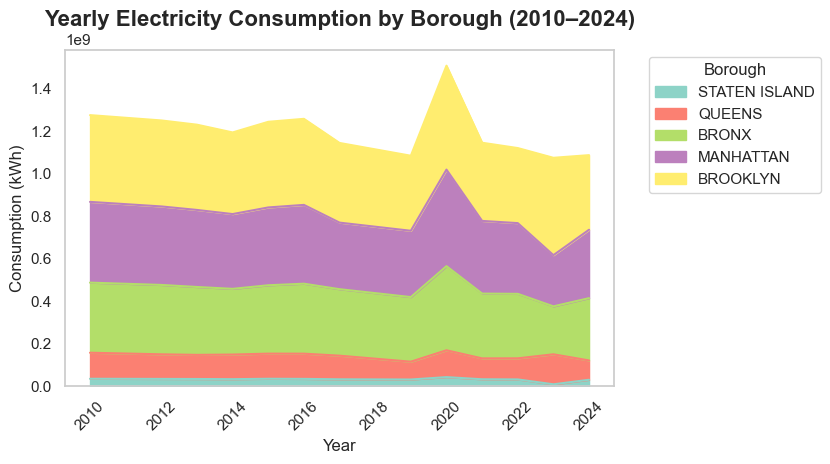

In [9]:
# Extract year from 'Revenue Month'
df_clean['Year'] = pd.to_datetime(df_clean['Revenue Month']).dt.year

# Pivot table by Year and Borough
area_df_yearly = df_clean.pivot_table(
    index='Year',
    columns='Borough',
    values='Consumption (KWH)',
    aggfunc='sum'
)

# Sort boroughs by total consumption (optional)
total_by_borough = area_df_yearly.sum().sort_values(ascending=True)
area_df_yearly = area_df_yearly[total_by_borough.index]

# Plot area chart
plt.figure(figsize=(12, 6))
area_df_yearly.plot.area(stacked=True, colormap='Set3')
plt.title("Yearly Electricity Consumption by Borough (2010–2024)", fontsize=16, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Consumption (kWh)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)
plt.legend(title='Borough', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

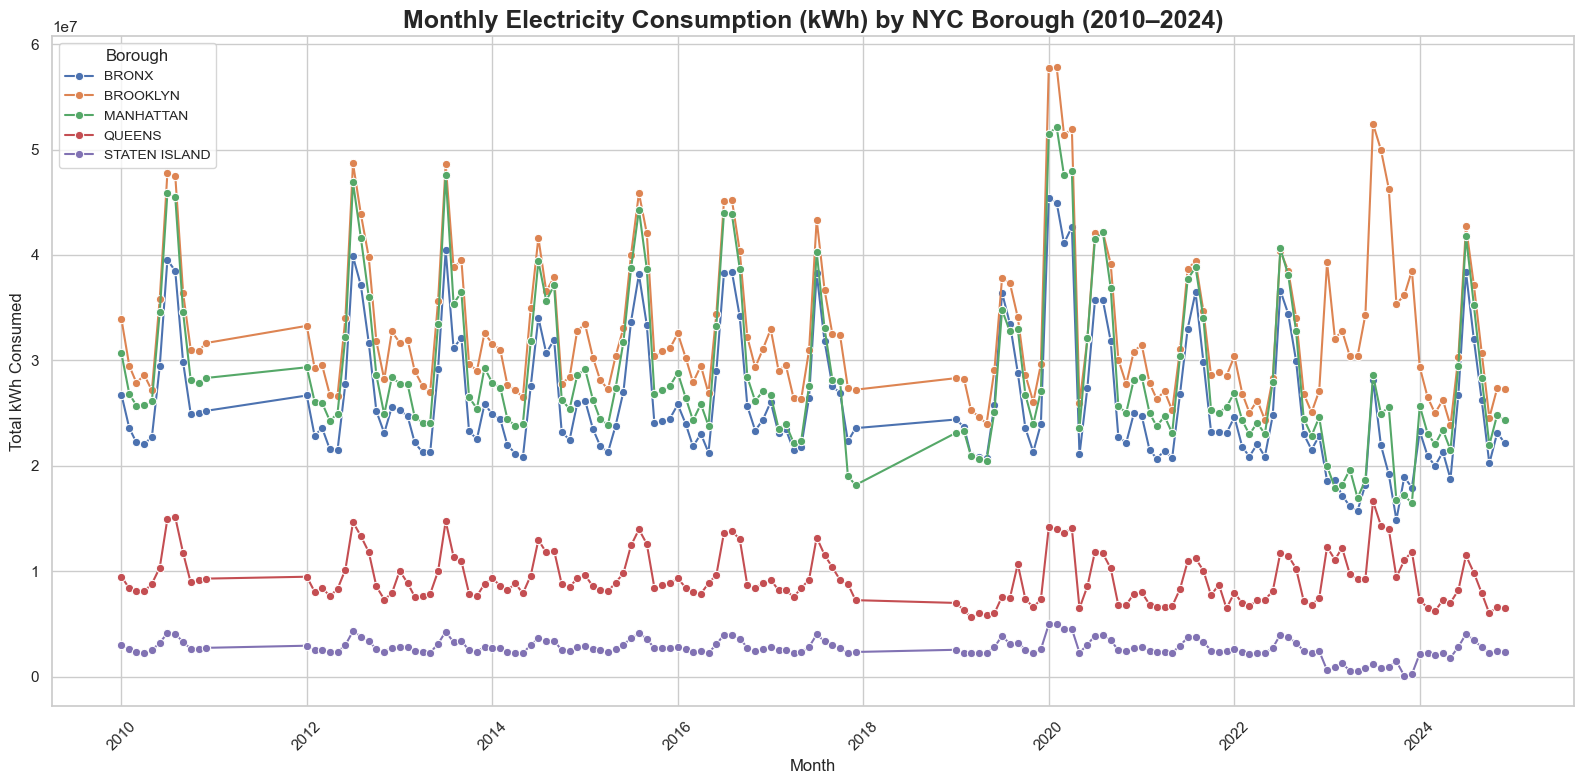

In [10]:
# STEP 7: Visualize monthly KWH consumption trends by borough
plt.figure(figsize=(16, 8))
sns.lineplot(data=monthly_kwh, x='Revenue Month', y='Total KWH', hue='Borough', marker='o')

plt.title("Monthly Electricity Consumption (kWh) by NYC Borough (2010–2024)", fontsize=18, weight='bold')
plt.xlabel("Month")
plt.ylabel("Total kWh Consumed")
plt.xticks(rotation=45)
plt.legend(title='Borough', title_fontsize=12, fontsize=10, loc='upper left')
plt.tight_layout()
plt.show()

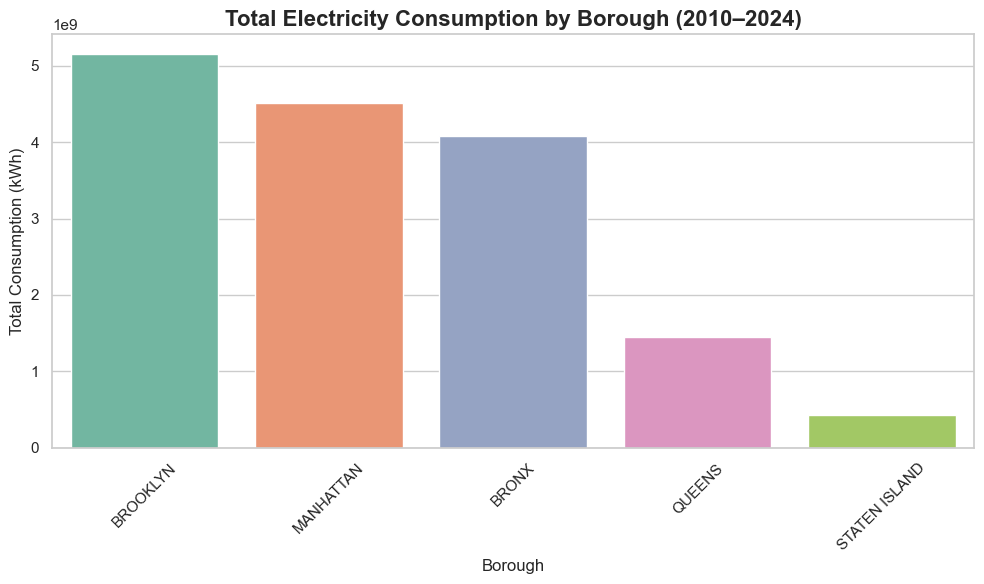

In [11]:
# Group and sort total kWh by borough
borough_total = (
    df_clean.groupby('Borough')['Consumption (KWH)']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)
plt.figure(figsize=(10, 6))
sns.barplot(data=borough_total, x='Borough', y='Consumption (KWH)', hue='Borough', legend=False, palette='Set2')
plt.title("Total Electricity Consumption by Borough (2010–2024)", fontsize=16, fontweight='bold')
plt.xlabel("Borough")
plt.ylabel("Total Consumption (kWh)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()